# Week1: CSV Data Analysis Review

At the end of the Python bootcamp, you were analysing csv files.  This is the first step for most data analysis.

In this lesson, we will add a few more tools to your concepts, including tuples. Then we will briefly introduce the basic tool for data analysis of multi-column datasets in Python, the pandas library.

First...

In order to read a file into the notebook, it must be in the same directory (or "folder") as the notebook you are running. You can see what files you have by using "ls":

In [1]:
ls

Course Policies.pdf                     Week 1 Tuples.ipynb
Notebook Tips! PLEASE READ.html         Week1 Lesson-Answers.py
Notebook Tips! PLEASE READ.ipynb        Week1 Pandas Intro.ipynb
Notebook Tips! PLEASE READ.pdf          Week1 Review Material and Tuples.ipynb
Notebook Tips! PLEASE READ_Copy.ipynb   data/
NotebookBasics.pdf                      data.zip
Week 1 Homework Problems.ipynb          grading/


My (and your) data is in the folder data, so we can list that and see the files. If this doesn't work, you need to download and unzip the data folder into the same directory as this notebook file.

In [2]:
ls data

goog.csv*             saved_goog.csv
more_data.csv         saved_goog_highs.csv


If that didn't work for you, you need to move the data folder into the same directory as this notebook. 

Let's load that file into python, using a recommended construction we didn't discuss in the bootcamp, and count the rows while we do that:

In [3]:
with open("data/goog.csv", errors="ignore") as file:
    rowCounter = 0
    for row in file:
        print(row)
        rowCounter += 1  # add one to the counter for each row

Date,Open,High,Low,Close,Volume

2010-01-04,313.16,314.44,311.81,313.06,

2010-01-05,313.28,313.61,310.46,311.68,

2010-01-06,312.62,312.62,302.88,303.83,

2010-01-07,304.4,304.7,296.03,296.75,

2010-01-08,295.7,301.32,294.26,300.71,

2010-01-11,301.93,301.93,296.72,300.25,

2010-01-12,298.74,298.78,293.71,294.94,

2010-01-13,287.96,293.9,286.66,293.25,

2010-01-14,291.66,296.8,291.11,294.63,

2010-01-15,295.5,296.48,288.73,289.71,

2010-01-19,290.45,294.91,287.86,293.52,

2010-01-20,292.7,292.7,287.36,289.91,

2010-01-21,291.43,293.12,285.84,291.2,

2010-01-22,281.97,285.01,267.16,274.73,

2010-01-25,273.02,274.66,267.49,269.73,

2010-01-26,268.72,274.53,267.88,270.94,

2010-01-27,270.36,273.55,267.39,270.78,

2010-01-28,271.97,273.23,265.03,266.88,

2010-01-29,268.98,270.22,262.54,264.71,

2010-02-01,267.03,267.64,264.88,266.24,

2010-02-02,267.21,267.21,263.54,265.29,

2010-02-03,264.07,270.78,263.85,270.14,

2010-02-04,268.23,268.73,262.52,263.13,

2010-02-05,263.94,266.48,260.97,2

In [4]:
print("There are", rowCounter, "rows in this data.")

There are 1258 rows in this data.


In [5]:
!head data/goog.csv

Date,Open,High,Low,Close,Volume
2010-01-04,313.16,314.44,311.81,313.06,
2010-01-05,313.28,313.61,310.46,311.68,
2010-01-06,312.62,312.62,302.88,303.83,
2010-01-07,304.4,304.7,296.03,296.75,
2010-01-08,295.7,301.32,294.26,300.71,
2010-01-11,301.93,301.93,296.72,300.25,
2010-01-12,298.74,298.78,293.71,294.94,
2010-01-13,287.96,293.9,286.66,293.25,
2010-01-14,291.66,296.8,291.11,294.63,


What are some things we might want to know about this stock data?
Maybe:
    
* highest value
* lowest value
* largest volume
* biggest difference in a single day (high-low)

You've done some of those things in the bootcamp when you looked for longest and shortest names.  We didn't save the data when we read it in.  We need to assign it to a variable.  I'll make a function to read and return that value.

In [6]:
def read_data(filename):
    # Function takes file path, and returns a list of the rows of the data
    data = []
    with open(filename, errors="ignore") as file:
        for row in file:
            data.append(row)
    return data

In [13]:
mydata = read_data("data/goog.csv")

In [14]:
len(mydata)

1258

In [15]:
mydata[0]

'Date,Open,High,Low,Close,Volume\n'

In [16]:
# Let's get rid of the first row using a slice operation to skip the first item
mydata = mydata[1:]

In [17]:
mydata[0]

'2010-01-04,313.16,314.44,311.81,313.06,\n'

In [18]:
len(mydata)

1257

Now let's make a function to find the highest value.  The question is which value do we check?  Let's just look at the High value.  But to make this general, let's just pass in the index of the column we want to check.  That way it's easy to check other columns!


In [22]:
def get_highest(data, column):
    highest = 0
    for row in data:
        # we have to split it up by the comma, to use the column index:
        vals = row.split(",")
        print(vals)
        if vals[column] > highest:
            highest = vals[column]
    return highest

In [23]:
get_highest(mydata,2)

['2010-01-04', '313.16', '314.44', '311.81', '313.06', '\n']


TypeError: unorderable types: str() > int()

The errors says it's a type error.  Remember, we read in text data.  We have to convert it to numbers to compare them!  There are decimals in stock data, so we want to make them floats.

In [25]:
def get_highest(data, column):
    highest = 0
    for row in data:
        vals = row.split(",")
        if float(vals[column]) > highest:
            highest = float(vals[column])
    return highest

In [27]:
get_highest(mydata, 1)

612.79

## Dictionaries Again

We did dictionaries at the end of the Python Bootcamp.  Let's review a little bit.  If we wanted to store each row in a dictionary using the date as the key, we could do it like this:

In [43]:
def make_dict(data):
    mydict = {}
    for row in data:
        vals = row.split(',')
        mydict[vals[0]] = vals[1:]
    return mydict

In [44]:
dictdata = make_dict(mydata)

In [45]:
dictdata.keys()

dict_keys(['2013-04-17', '2010-03-24', '2010-09-02', '2014-05-13', '2014-04-17', '2011-02-11', '2010-07-22', '2014-09-05', '2012-04-13', '2010-05-06', '2012-08-16', '2013-03-04', '2010-06-30', '2012-02-24', '2012-03-02', '2013-05-03', '2011-06-01', '2013-12-16', '2010-12-23', '2014-06-17', '2014-08-06', '2010-02-01', '2011-12-05', '2010-02-09', '2012-01-23', '2011-09-30', '2014-01-23', '2012-01-10', '2013-02-21', '2011-08-22', '2013-08-05', '2011-06-23', '2014-12-04', '2013-07-24', '2014-05-21', '2010-07-08', '2013-07-05', '2010-06-15', '2014-02-25', '2012-11-13', '2010-08-24', '2012-12-24', '2014-03-07', '2014-04-24', '2011-02-08', '2012-08-14', '2012-05-02', '2013-11-05', '2012-12-14', '2012-07-30', '2011-05-03', '2011-11-02', '2010-07-07', '2010-08-27', '2012-02-13', '2013-10-04', '2014-12-12', '2013-02-28', '2014-10-03', '2010-02-17', '2011-10-17', '2011-01-10', '2010-06-24', '2011-03-22', '2012-03-15', '2013-09-30', '2011-03-11', '2010-08-20', '2013-09-10', '2012-12-07', '2013-01-

In [46]:
dictdata.values()

dict_values([['392.98', '395.03', '388.66', '390.89', '\n'], ['272.48', '279.64', '269.58', '278.39', '\n'], ['231.19', '231.98', '229.92', '231.36', '\n'], ['530.89', '536.07', '529.51', '533.09', '1648907.0\n'], ['548.81', '549.5', '531.15', '536.1', '6795393.0\n'], ['306.59', '312.19', '306.19', '311.94', '\n'], ['241.37', '244.25', '241.0', '242.16', '\n'], ['583.98', '586.55', '581.95', '586.08', '1629477.0\n'], ['323.45', '324.17', '311.46', '311.99', '\n'], ['254.12', '258.5', '229.77', '249.09', '\n'], ['333.42', '336.98', '333.21', '336.1', '\n'], ['402.25', '411.01', '402.1', '410.34', '\n'], ['227.25', '228.69', '222.14', '222.25', '\n'], ['303.37', '305.52', '302.45', '304.65', '\n'], ['310.69', '311.69', '309.85', '310.31', '\n'], ['418.06', '422.98', '417.58', '422.44', '\n'], ['263.76', '266.33', '262.39', '262.54', '\n'], ['530.97', '536.81', '530.47', '535.95', '\n'], ['302.37', '302.7', '300.71', '301.81', '\n'], ['544.2', '545.32', '539.33', '543.01', '1445878.0\n'],

Notice there is a bad "\n" character in here. Also, notice that some of the lists don't have all the same number of elements.  Volume is missing from a bunch of dates. Let's use "strip" to clean the "\n" up and also do a bunch of list comprehensions to clean and change the data to numbers:

In [57]:
def make_dict(data):
    mydict = {}
    for row in data:
        vals = row.split(',')
        # this is a list comprehension that applies strip to remove whitespace chars including
        # \n from each value in the vals list, then reassigns the result to vals, overwriting
        # the previous messy list.
        vals = [val.strip() for val in vals]
        # another list comprehension -- now we turn everything into a floating point number,
        # except for the first value, which is the date string and except for the empty strings.
        # There is an if-test to rule out the '' empty strings!
        floats = [float(val) for val in vals[1:] if val != '']
        # now we save the floats list to the dictionary using the date, the first item, as key
        mydict[vals[0]] = floats
    return mydict

In [58]:
dictdata = make_dict(mydata)

In [60]:
dictdata.values()

dict_values([[392.98, 395.03, 388.66, 390.89], [272.48, 279.64, 269.58, 278.39], [231.19, 231.98, 229.92, 231.36], [530.89, 536.07, 529.51, 533.09, 1648907.0], [548.81, 549.5, 531.15, 536.1, 6795393.0], [306.59, 312.19, 306.19, 311.94], [241.37, 244.25, 241.0, 242.16], [583.98, 586.55, 581.95, 586.08, 1629477.0], [323.45, 324.17, 311.46, 311.99], [254.12, 258.5, 229.77, 249.09], [333.42, 336.98, 333.21, 336.1], [402.25, 411.01, 402.1, 410.34], [227.25, 228.69, 222.14, 222.25], [303.37, 305.52, 302.45, 304.65], [310.69, 311.69, 309.85, 310.31], [418.06, 422.98, 417.58, 422.44], [263.76, 266.33, 262.39, 262.54], [530.97, 536.81, 530.47, 535.95], [302.37, 302.7, 300.71, 301.81], [544.2, 545.32, 539.33, 543.01, 1445878.0], [561.78, 570.7, 560.0, 566.37, 1330877.0], [267.03, 267.64, 264.88, 266.24], [313.51, 315.63, 310.89, 312.51], [269.5, 270.49, 267.27, 267.95], [292.71, 294.04, 291.29, 292.47], [259.84, 261.74, 256.93, 257.26], [579.42, 580.66, 576.61, 579.47], [314.56, 316.58, 308.15, 

Notice the results are a list of lists, but the type is a dict_values.  That means using indexing to access or slice values won't work:

In [61]:
dictdata.values()[0]

TypeError: 'dict_values' object does not support indexing

But we can convert to a list easily and then do it:

In [62]:
list(dictdata.values())[0]

[392.98, 395.03, 388.66, 390.89]

How would we find which dates have closing volume and which don't? We can check the length of the lists in each key.

In [63]:
for key, value in dictdata.items():
    if len(value) == 5:
        print("Date {} has volume of {}".format(key, value[4]))

Date 2014-05-13 has volume of 1648907.0
Date 2014-04-17 has volume of 6795393.0
Date 2014-09-05 has volume of 1629477.0
Date 2014-06-17 has volume of 1445878.0
Date 2014-08-06 has volume of 1330877.0
Date 2014-12-04 has volume of 1392208.0
Date 2014-05-21 has volume of 1193389.0
Date 2014-04-24 has volume of 1881965.0
Date 2014-12-12 has volume of 1989117.0
Date 2014-10-03 has volume of 1138636.0
Date 2014-07-10 has volume of 1353317.0
Date 2014-06-19 has volume of 2451341.0
Date 2014-11-06 has volume of 1329604.0
Date 2014-07-15 has volume of 1618815.0
Date 2014-05-06 has volume of 1684381.0
Date 2014-10-29 has volume of 1767107.0
Date 2014-04-29 has volume of 2692489.0
Date 2014-11-18 has volume of 1957664.0
Date 2014-08-27 has volume of 1700161.0
Date 2014-08-26 has volume of 1635465.0
Date 2014-08-01 has volume of 1950171.0
Date 2014-09-24 has volume of 1724537.0
Date 2014-06-05 has volume of 1684886.0
Date 2014-10-22 has volume of 2917183.0
Date 2014-08-22 has volume of 789484.0
D

Remember that dictionaries aren't ordered. But our data is inherently ordered by date.  Luckily, there is a special type of dictionary called OrderedDict that will retain order for us.  It lives in the collections library, just like the useful Counter does.  The documentation is here: https://docs.python.org/3/library/collections.html#collections.OrderedDict

In [64]:
from collections import OrderedDict

In [65]:
# We create one using a sorted version of the dict we made, sorting by the first value in items, 
# which is the date:
ordereddata = OrderedDict(sorted(dictdata.items(), key=lambda x: x[0]))

In [66]:
type(ordereddata)

collections.OrderedDict

In [67]:
#Now we can verify that the keys are in order:
ordereddata.keys()

odict_keys(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15', '2010-01-19', '2010-01-20', '2010-01-21', '2010-01-22', '2010-01-25', '2010-01-26', '2010-01-27', '2010-01-28', '2010-01-29', '2010-02-01', '2010-02-02', '2010-02-03', '2010-02-04', '2010-02-05', '2010-02-08', '2010-02-09', '2010-02-10', '2010-02-11', '2010-02-12', '2010-02-16', '2010-02-17', '2010-02-18', '2010-02-19', '2010-02-22', '2010-02-23', '2010-02-24', '2010-02-25', '2010-02-26', '2010-03-01', '2010-03-02', '2010-03-03', '2010-03-04', '2010-03-05', '2010-03-08', '2010-03-09', '2010-03-10', '2010-03-11', '2010-03-12', '2010-03-15', '2010-03-16', '2010-03-17', '2010-03-18', '2010-03-19', '2010-03-22', '2010-03-23', '2010-03-24', '2010-03-25', '2010-03-26', '2010-03-29', '2010-03-30', '2010-03-31', '2010-04-05', '2010-04-06', '2010-04-07', '2010-04-08', '2010-04-09', '2010-04-12', '2010-04-13', '2010-04-14', '2010-04-15', '2010-04

That means that the data is too... so we can get all the values for the low and high and make charts if we want.  The basic charting tools in Python are Matplotlib, which is not very easy to use.  We will not do complex things with it.  Seaborn is a tool that improves your charting options a bit, and makes things look better.  As soon as you import it, it improves your chart style, without having to do anything!  You want to use these 3 lines all the time:

In [70]:
import matplotlib.pyplot as plt
import seaborn
# the following line means "put my charts inside the notebook, instead of somewhere else."
%matplotlib inline

In [72]:
highs = [val[1][1] for val in list(ordereddata.items())]

In [71]:
list(ordereddata.items())

[('2010-01-04', [313.16, 314.44, 311.81, 313.06]),
 ('2010-01-05', [313.28, 313.61, 310.46, 311.68]),
 ('2010-01-06', [312.62, 312.62, 302.88, 303.83]),
 ('2010-01-07', [304.4, 304.7, 296.03, 296.75]),
 ('2010-01-08', [295.7, 301.32, 294.26, 300.71]),
 ('2010-01-11', [301.93, 301.93, 296.72, 300.25]),
 ('2010-01-12', [298.74, 298.78, 293.71, 294.94]),
 ('2010-01-13', [287.96, 293.9, 286.66, 293.25]),
 ('2010-01-14', [291.66, 296.8, 291.11, 294.63]),
 ('2010-01-15', [295.5, 296.48, 288.73, 289.71]),
 ('2010-01-19', [290.45, 294.91, 287.86, 293.52]),
 ('2010-01-20', [292.7, 292.7, 287.36, 289.91]),
 ('2010-01-21', [291.43, 293.12, 285.84, 291.2]),
 ('2010-01-22', [281.97, 285.01, 267.16, 274.73]),
 ('2010-01-25', [273.02, 274.66, 267.49, 269.73]),
 ('2010-01-26', [268.72, 274.53, 267.88, 270.94]),
 ('2010-01-27', [270.36, 273.55, 267.39, 270.78]),
 ('2010-01-28', [271.97, 273.23, 265.03, 266.88]),
 ('2010-01-29', [268.98, 270.22, 262.54, 264.71]),
 ('2010-02-01', [267.03, 267.64, 264.88,

In [73]:
highs

[314.44,
 313.61,
 312.62,
 304.7,
 301.32,
 301.93,
 298.78,
 293.9,
 296.8,
 296.48,
 294.91,
 292.7,
 293.12,
 285.01,
 274.66,
 274.53,
 273.55,
 273.23,
 270.22,
 267.64,
 267.21,
 270.78,
 268.73,
 266.48,
 270.73,
 270.49,
 268.63,
 269.97,
 268.31,
 271.79,
 271.43,
 272.23,
 271.74,
 273.48,
 271.54,
 268.95,
 263.98,
 265.61,
 266.38,
 272.56,
 273.79,
 277.79,
 283.55,
 282.31,
 282.05,
 288.96,
 292.81,
 293.84,
 284.44,
 283.93,
 285.44,
 283.94,
 283.72,
 283.14,
 278.88,
 279.64,
 285.71,
 283.41,
 282.08,
 283.53,
 284.59,
 287.15,
 285.16,
 284.09,
 284.64,
 284.1,
 286.71,
 294.15,
 295.87,
 298.62,
 284.12,
 276.72,
 279.55,
 279.84,
 275.97,
 274.39,
 272.22,
 268.9,
 267.15,
 267.98,
 268.57,
 266.19,
 263.11,
 257.6,
 258.5,
 252.41,
 261.15,
 259.68,
 255.76,
 260.74,
 255.24,
 253.93,
 255.23,
 249.47,
 242.55,
 242.26,
 244.65,
 238.49,
 244.64,
 245.91,
 246.48,
 245.28,
 246.69,
 253.75,
 254.37,
 250.2,
 244.18,
 244.2,
 244.01,
 244.11,
 247.0,
 249.95,
 25

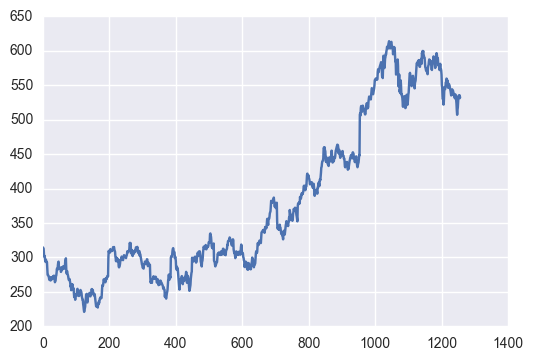

In [74]:
plt.plot(highs)

Now open the Pandas notebook!